### "HOUSE PRICE PREDICTION/ESTIMATION"

##### A MACHINE LEARNING PROJECT THAT AIMS TO PREDICT OR ESTIMATE THE PRICE OF THE PROPERTY/HOUSE/UNIT BASED ON THE FOLLOWING PARAMETERS: HOUSE TYPE, FLOOR AREA, NO. OF BR, T&B, LOCATION, AND TEXTUAL DESCRIPTION, USING RANDOM FOREST REGRESSOR AND TF-IDF FUNCTION
##### Data: Philippines' Real Estate Data
##### Data Source: https://www.lamudi.com.ph/

#### 1: Data Pre-processing

In [1]:
# Import common libraries
import pandas as pd
import numpy as np
df_house = pd.read_excel("PH_houses_3.xlsx")
df_house.dropna().drop_duplicates()
df_house.info()
display(df_house)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Description       1358 non-null   object 
 1   Location          1358 non-null   object 
 2   Price (PHP)       1358 non-null   int64  
 3   Bedrooms          1358 non-null   int64  
 4   Bath              1358 non-null   int64  
 5   Floor_area (sqm)  1358 non-null   int64  
 6   Latitude          1358 non-null   float64
 7   Longitude         1358 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 85.0+ KB


,Description,Location,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Latitude,Longitude
0,Penthouse Unit (54E) - Residences at The Galle...,"San Antonio, Pasig",175265000,4,4,409,14.588377,121.059897
1,Penthouse Unit (54B) - Residences at The Galle...,"San Antonio, Pasig",128592000,4,4,317,14.588377,121.059897
2,Penthouse Unit (54C) - Residences at The Galle...,"San Antonio, Pasig",111512000,4,4,268,14.588377,121.059897
3,3-Bedroom Bi-Level (58A) for Sale in Empress a...,"Oranbo, Pasig",89146000,3,3,241,14.575822,121.064324
4,3-Bedroom Unit (59H) for Sale in Empress at Ca...,"Oranbo, Pasig",57210000,3,3,152,14.575822,121.064324
...,...,...,...,...,...,...,...,...
1353,ROSE (Bare 2-Storey Inner Unit) - Marytown Pla...,"Bulac, Santa Maria",1400000,1,1,46,14.834660,121.339190
1354,ROSE (Bare 2-Storey End Unit) - Marytown Place...,"Bulac, Santa Maria",1400000,1,1,46,14.834660,121.339190
1355,1BR Quadruplex House and Lot (Legato Model) fo...,"Majada Labas, Calamba",1366658,1,1,25,14.196755,121.104962
1356,ROSE (Bare 2-Storey Inner Unit) - Marytown Pla...,"Bulac, Santa Maria",1160000,1,1,46,14.834660,121.339190


In [4]:
# Rename columns for simplicity
df_house.rename(columns = {'Price (PHP)':'Price', 'Floor_area (sqm)':'Area'}, inplace = True)
df_house = df_house.astype({'Price':'float','Bedrooms':'float', 'Bath':'float', 'Area':'float'}) 

# Shuffle the rows randomly to distribute adjacent houses that are on the same location
df_house = df_house.sample(frac=1, random_state=42)
df_house.reset_index(drop=True, inplace=True)
display(df_house)

,Description,Location,Price,Bedrooms,Bath,Area,Latitude,Longitude
0,2BR Condo in Valenzuela for Sale - Moldex Resi...,"Paso de Blas, Valenzuela",4050000.0,2.0,2.0,36.0,14.704999,120.985180
1,1BR Condo Unit for Sale in Seville Residences ...,"Bagumbayan, Quezon City",9397390.0,1.0,1.0,46.0,14.605396,121.081903
2,3 bedroom House and Lot for Sale in San Franci...,"Palo-Alto, Calamba",4767000.0,3.0,3.0,72.0,14.188482,121.109967
3,"Studio Unit for Sale at Woodsville Crest, Merv...","Merville, Paranaque",4740000.0,1.0,1.0,23.0,14.499387,121.025633
4,1-Bedroom Unit (N29E2) for Sale in Maven at Ca...,"Ortigas CBD, Pasig",11166400.0,1.0,1.0,52.0,14.583771,121.059675
...,...,...,...,...,...,...,...,...
1353,Studio Condo Unit (10F) for Sale in One Sierra...,"Highway Hills, Mandaluyong",7961511.0,1.0,1.0,33.0,14.578255,121.052143
1354,2-Bedroom Unit (S54G) for Sale in Maven at Cap...,"Ortigas CBD, Pasig",17641900.0,2.0,2.0,74.0,14.583771,121.059675
1355,1-Bedroom Unit (42J) - Residences at The Galle...,"San Antonio, Pasig",27332000.0,1.0,1.0,70.0,14.588377,121.059897
1356,1-Bedroom Condo Unit for Sale at Legacy Leisur...,"Ma-A, Davao",3702460.0,1.0,1.0,32.0,7.086749,125.584030


#### 2: Textual Data Vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Processing
# Vectorize the Description column using TF-IDF
tfidf_d = TfidfVectorizer() #tfidf function for description text data
tfidf_description = tfidf_d.fit_transform(df_house['Description'])
tfidf_description_data = tfidf_d.transform(df_house['Description'])

# Vectorize the Location column using TF-IDF
tfidf_l = TfidfVectorizer() #tfidf function for location text data
tfidf_location = tfidf_l.fit_transform(df_house['Location'])
tfidf_location_data = tfidf_l.transform(df_house['Location'])

# Get the vocabulary learned from the training data
description_vocabulary = tfidf_d.get_feature_names_out()
location_vocabulary = tfidf_l.get_feature_names_out()

df_tfidf =pd.concat(
    [pd.DataFrame(tfidf_description_data.toarray(), columns=description_vocabulary)
    ,pd.DataFrame(tfidf_location_data.toarray(), columns=location_vocabulary)], axis=1)

display(df_tfidf)

# Combine tfidf data with house data
df_final = df_house.drop(['Description', 'Location'], axis=1)
df_final = pd.concat([df_final, df_tfidf] , axis=1)
display(df_final)

df_final.info()

,00,000,02,04,05,06,08,10,100,1008,...,tomas,trece,trias,ugong,uno,valenzuela,valle,wack,west,zapatera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Price,Bedrooms,Bath,Area,Latitude,Longitude,00,000,02,04,...,tomas,trece,trias,ugong,uno,valenzuela,valle,wack,west,zapatera
0,4050000.0,2.0,2.0,36.0,14.704999,120.985180,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,9397390.0,1.0,1.0,46.0,14.605396,121.081903,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4767000.0,3.0,3.0,72.0,14.188482,121.109967,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4740000.0,1.0,1.0,23.0,14.499387,121.025633,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11166400.0,1.0,1.0,52.0,14.583771,121.059675,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,7961511.0,1.0,1.0,33.0,14.578255,121.052143,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1354,17641900.0,2.0,2.0,74.0,14.583771,121.059675,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1355,27332000.0,1.0,1.0,70.0,14.588377,121.059897,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1356,3702460.0,1.0,1.0,32.0,7.086749,125.584030,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Columns: 1377 entries, Price to zapatera
dtypes: float64(1377)
memory usage: 14.3 MB


#### 3: Data Preparation for Training

In [6]:
# Train-Test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error # Import accuracy metric for later use

X = df_final.drop(['Price'], axis=1)
y = df_final['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1086, 1376) (1086,) (272, 1376) (272,)


#### 4: Build, Train, and Select Appropriate Machine Learning Model

In [7]:
# Build and Evaluate Linear Regression Model
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred_LR = model_LR.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred_LR))


58656646.73604155


In [8]:
# Build and Evaluate Support Vector Machine (SVM) Model
from sklearn import svm
from sklearn.svm import SVC


model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred_SVR = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred_SVR))


0.7303015630168885


In [9]:
# Build and Evaluate Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier(max_depth=3, random_state=42)
model_DTC.fit(X_train,y_train)
Y_pred_DTC = model_DTC.predict(X_test)

print(mean_absolute_percentage_error(y_test, Y_pred_DTC))

1.1363655571799802


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
Y_pred_RFR = model_RFR.predict(X_test)

mean_absolute_percentage_error(y_test, Y_pred_RFR)

0.10743708275795676

##### Having the lowest mean absolute percentage error, Random Forest Regressor (RFR) model is selected.

#### 5: Predict/estimate house price 

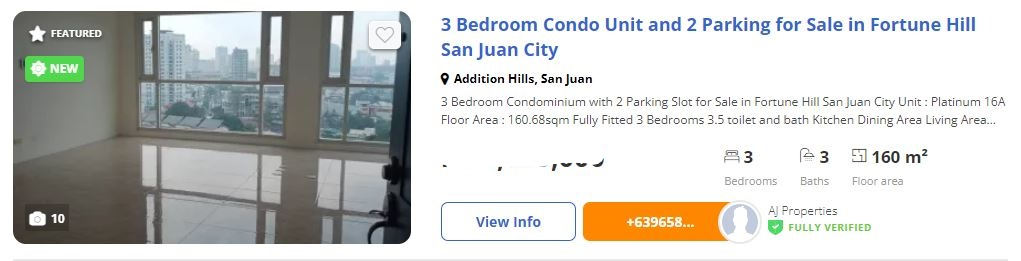

source: https://www.lamudi.com.ph/3-bedroom-condo-unit-and-2-parking-for-sale-in-for-16889748877.html#  ,  Latitude = 14.5939458, Longitude = 121.0389312

In [11]:
new_description = str('3 Bedroom Condo Unit and 2 Parking for Sale in Fortune Hill San Juan City')
new_location = str('ADDITION HILLS, SAN JUAN')
new_bedroom = 3
new_bath = 3
new_floor_area = 160
new_latitude = 14.5939458
new_longitude = 121.0389312

new_numerical_features = pd.DataFrame({
    'Bedrooms': [new_bedroom],
    'Bath': [new_bath],
    'Area': [new_floor_area],
    'Latitude': [new_latitude],
    'Longitude': [new_longitude]
}).astype(float)

# Text Processing
new_description_processed = tfidf_d.transform([new_description])
new_location_processed = tfidf_l.transform([new_location])

# Create a DataFrame for the new house's data
df_new_processed_description = pd.DataFrame(new_description_processed.toarray(), columns=description_vocabulary)
df_new_processed_location = pd.DataFrame(new_location_processed.toarray(), columns=location_vocabulary)
new_processed = pd.concat([new_numerical_features, df_new_processed_description, df_new_processed_location], axis=1)
display(new_processed)

# Perform prediction
predicted_price = model_RFR.predict(new_processed)
print(f"PREDICTED/ESTIMATED PRICE OF THE PROPERTY(HOUSE): {predicted_price} PESOS")

,Bedrooms,Bath,Area,Latitude,Longitude,00,000,02,04,05,...,tomas,trece,trias,ugong,uno,valenzuela,valle,wack,west,zapatera
0,3.0,3.0,160.0,14.593946,121.038931,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PREDICTED/ESTIMATED PRICE OF THE PROPERTY(HOUSE): [33677044.8] PESOS


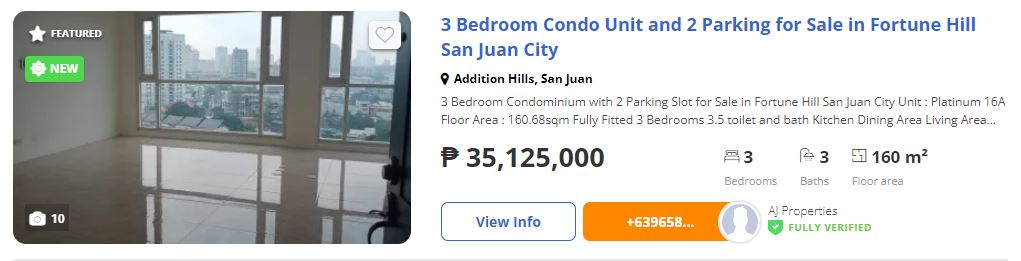

                                    The real price of the property is 35,125,000 pesos.

THE PREDICTED/ESTIMATED PRICE OF THE PROPERTY(HOUSE) IS 33,677,044 PESOS, WHILE ITS ACTUAL PRICE IS 35,125,00, THE PERCENTAGE PRICE DIFFERENCE IS AT ~4%

Note: The greatest limitation of this mini-project is the lack of data, for further improvement, extraction and collection of data shall be done through web-scraping multiple real estate listing site. 

.

.

#### Experiment: Retrain the RFR Model but using the whole dataset as train data.

In [38]:
X2 = df_final.drop(['Price'], axis=1)
y2 = df_final['Price'].values

model_RFR2 = RandomForestRegressor(n_estimators=10)
model_RFR2.fit(X2, y2)
Y_pred_RFR2 = model_RFR2.predict(X2)

mean_absolute_percentage_error(y2, Y_pred_RFR2)

0.036039026456633975

In [39]:
# Perform prediction
predicted_price2 = model_RFR2.predict(new_processed)
print(f"PREDICTED/ESTIMATED PRICE OF THE PROPERTY(HOUSE): {predicted_price2} PESOS")

PREDICTED/ESTIMATED PRICE OF THE PROPERTY(HOUSE): [26987420.8] PESOS
